<a href="https://colab.research.google.com/github/jamesbrowne98/jamesbrowne98/blob/main/CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("ENB2012_data.xlsx")
print(data)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


inputs = data.values[:,:8].astype(float)
targets = data.values[:,8:].astype(float)
print(np.shape(inputs))

#Normalize the inputs
scaler = MinMaxScaler()
scaled_inputs = scaler.fit_transform(inputs)
scaled_targets = scaler.fit_transform(targets)

print(scaled_inputs)
print(scaled_targets)



(768, 8)
[[1.         0.         0.28571429 ... 0.         0.         0.        ]
 [1.         0.         0.28571429 ... 0.33333333 0.         0.        ]
 [1.         0.         0.28571429 ... 0.66666667 0.         0.        ]
 ...
 [0.         1.         0.71428571 ... 0.33333333 1.         1.        ]
 [0.         1.         0.71428571 ... 0.66666667 1.         1.        ]
 [0.         1.         0.71428571 ... 1.         1.         1.        ]]
[[0.25721219 0.28090493]
 [0.25721219 0.28090493]
 [0.25721219 0.28090493]
 ...
 [0.28120787 0.1672502 ]
 [0.28228633 0.153784  ]
 [0.28660016 0.13816321]]


Random Forest Regressor

In [4]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(scaled_inputs, scaled_targets)
outputs = regressor.predict(scaled_inputs)
print("Random Forest Regressor: \n", outputs)

Random Forest Regressor: 
 [[0.26378808 0.28895502]
 [0.26158533 0.28325882]
 [0.26101645 0.28354969]
 ...
 [0.28326503 0.16381901]
 [0.28473443 0.15192028]
 [0.28668644 0.14442769]]


MLP Regressor

In [5]:
from sklearn.neural_network import MLPRegressor
regressor_NN = MLPRegressor(max_iter=5000)
regressor_NN.fit(scaled_inputs, scaled_targets)
outputs = regressor_NN.predict(scaled_inputs)
print("MLP Regressor: \n", outputs)


MLP Regressor: 
 [[0.35543496 0.37964474]
 [0.37564125 0.37019973]
 [0.39210525 0.36935634]
 ...
 [0.32392476 0.25736417]
 [0.33126876 0.24930778]
 [0.34959274 0.25044455]]


Support Vector Machine 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("ENB2012_data.xlsx")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [68]:
from sklearn.svm import SVR
targetY1 = data["Y1"]
targetY2 = data["Y2"]

x = df.iloc[:, 1:2].values
targetY1 = df.iloc[:, 2].values
targetY2 = df.iloc[:, 2].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)


In [70]:
from sklearn.svm import SVR
regressor_svm = SVR(kernel = 'rbf')
regressor_svm2 = SVR(kernel = 'rbf')
regressor_svm.fit(x,targetY1)
regressor_svm2.fit(x,targetY2)

SVR()

In [73]:
regressor_svm.score(x,targetY1)
regressor_svm2.score(x,targetY2)

0.2624617377486791

Part 1.3 

In [10]:
from numpy.lib.shape_base import split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy.ma.core import reshape
from sklearn.base import ClassifierMixin

In [11]:
x_train, xtest, ytrain, ytest = train_test_split(scaled_inputs, scaled_targets, test_size=0.3)

In [37]:
#making predictions for models 
#for training
y_pred_regressor_tr = regressor.predict(x_train)
y_pred_regressor_NN_tr = regressor_NN.predict(x_train)
#y_pred_regressor_svm_tr = regressor_svm.predict(x_train)

#for testing

y_pred_regressor = regressor.predict(xtest)
y_pred_regressor_NN = regressor_NN.predict(xtest)
#y_pred_regressor_svm = regressor_svm.predict(xtest)

In [38]:
#Calculating MSE
from sklearn.metrics import mean_absolute_error

#for training
mse_regressor_tr = mean_absolute_error(ytrain, y_pred_regressor_tr)
mse_regressor_NN_tr = mean_absolute_error(ytrain, y_pred_regressor_NN_tr)
#mse_regressor_svm_tr = mean_absolute_error(ytrain, y_pred_regressor_svm_tr)

#for testing
mse_regressor = mean_absolute_error(ytest, y_pred_regressor)
mse_regressor_NN = mean_absolute_error(ytest, y_pred_regressor_NN)
#mse_regressor_svm = mean_absolute_error(ytest, y_pred_regressor_svm)


In [ ]:
print(f"Testing MSE of Random Forest is {mse_regressor}")
print(f"Training MSE of Random Forest is {mse_regressor_tr}")
print()

print(f"Training MSE of Neural Network is {mse_regressor_NN_tr}")
print(f"Testing MSE of Neural Network is {mse_regressor_NN}")
print()

#print(f"Training MSE of Support Vector is {mse_regressor_svm_tr}")
#print(f"Testing MSE of Support Vector is {mse_regressor_svm}")

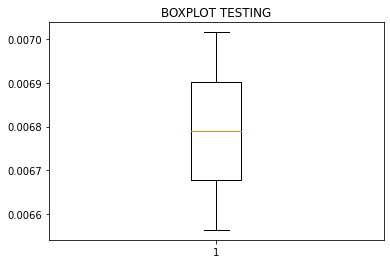

In [55]:
import matplotlib.pyplot as plt
plt.title("BOXPLOT TESTING")
plt.boxplot([mse_regressor, mse_regressor_tr])
plt.show()

Part 2 


In [ ]:
list = []
f = open("Modules.txt", 'r')
for line in f: list.append(line.split("|"))
f.close()
print(list)